Yapay Zeka - 2022-2023 Güz Dönemi - Nişantaşı Üniversitesi

Bölüm:Bilgisayar Mühendisliği 
Ad-Soyad:Yekta Hamit Pektaş
Numara:20202013032

https://www.kaggle.com/datasets/adityasangle/tomato-disease-detection

# Gerekli Kütüphaneler

In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt

import cv2 
import os 
from PIL import Image 
import glob
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Sınıflandırma Ve Örneklem İşlemleri

In [2]:
train_path =r'C:\Users\YekHam\YapayZeka_Proje\Tomato disease\train'
classes = os.listdir(train_path)
print("Sınıf Sayısı:",len(classes))
classes

Sınıf Sayısı: 10


['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [3]:
train_path =f'C:/Users/YekHam/YapayZeka_Proje/Tomato disease/train' 
classes = os.listdir(train_path) 

image_dict = {} 
count_dict = {} 

for cls in classes:
 
    file_paths = glob.glob(f'C:/Users/YekHam/YapayZeka_Proje/Tomato disease/train/{cls}/*')
    count_dict[cls] = len(file_paths) 
    image_path = random.choice(file_paths)
    image_dict[cls] = tf.keras.utils.load_img(image_path)

In [4]:
df_count_train = pd.DataFrame({
    "class": count_dict.keys(),   
    "count": count_dict.values(),   
})
print("Sınıf başına eğitim örneği sayısı:\n", df_count_train)

Sınıf başına eğitim örneği sayısı:
                                            class  count
0                        Tomato___Bacterial_spot   1702
1                          Tomato___Early_blight   1920
2                               Tomato___healthy   1926
3                           Tomato___Late_blight   1851
4                             Tomato___Leaf_Mold   1882
5                    Tomato___Septoria_leaf_spot   1745
6  Tomato___Spider_mites Two-spotted_spider_mite   1741
7                           Tomato___Target_Spot   1827
8                   Tomato___Tomato_mosaic_virus   1790
9         Tomato___Tomato_Yellow_Leaf_Curl_Virus   1961


# Visualize İşlemleri

<Figure size 1500x1200 with 0 Axes>

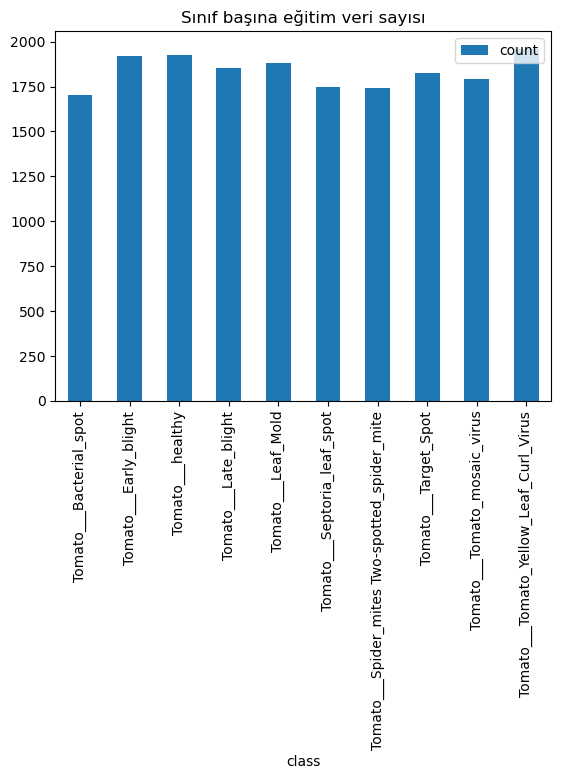

In [5]:
plt.figure(figsize=(15,12)) 
df_count_train.plot.bar(x='class', y='count', title="Sınıf başına eğitim veri sayısı") 
plt.show() 

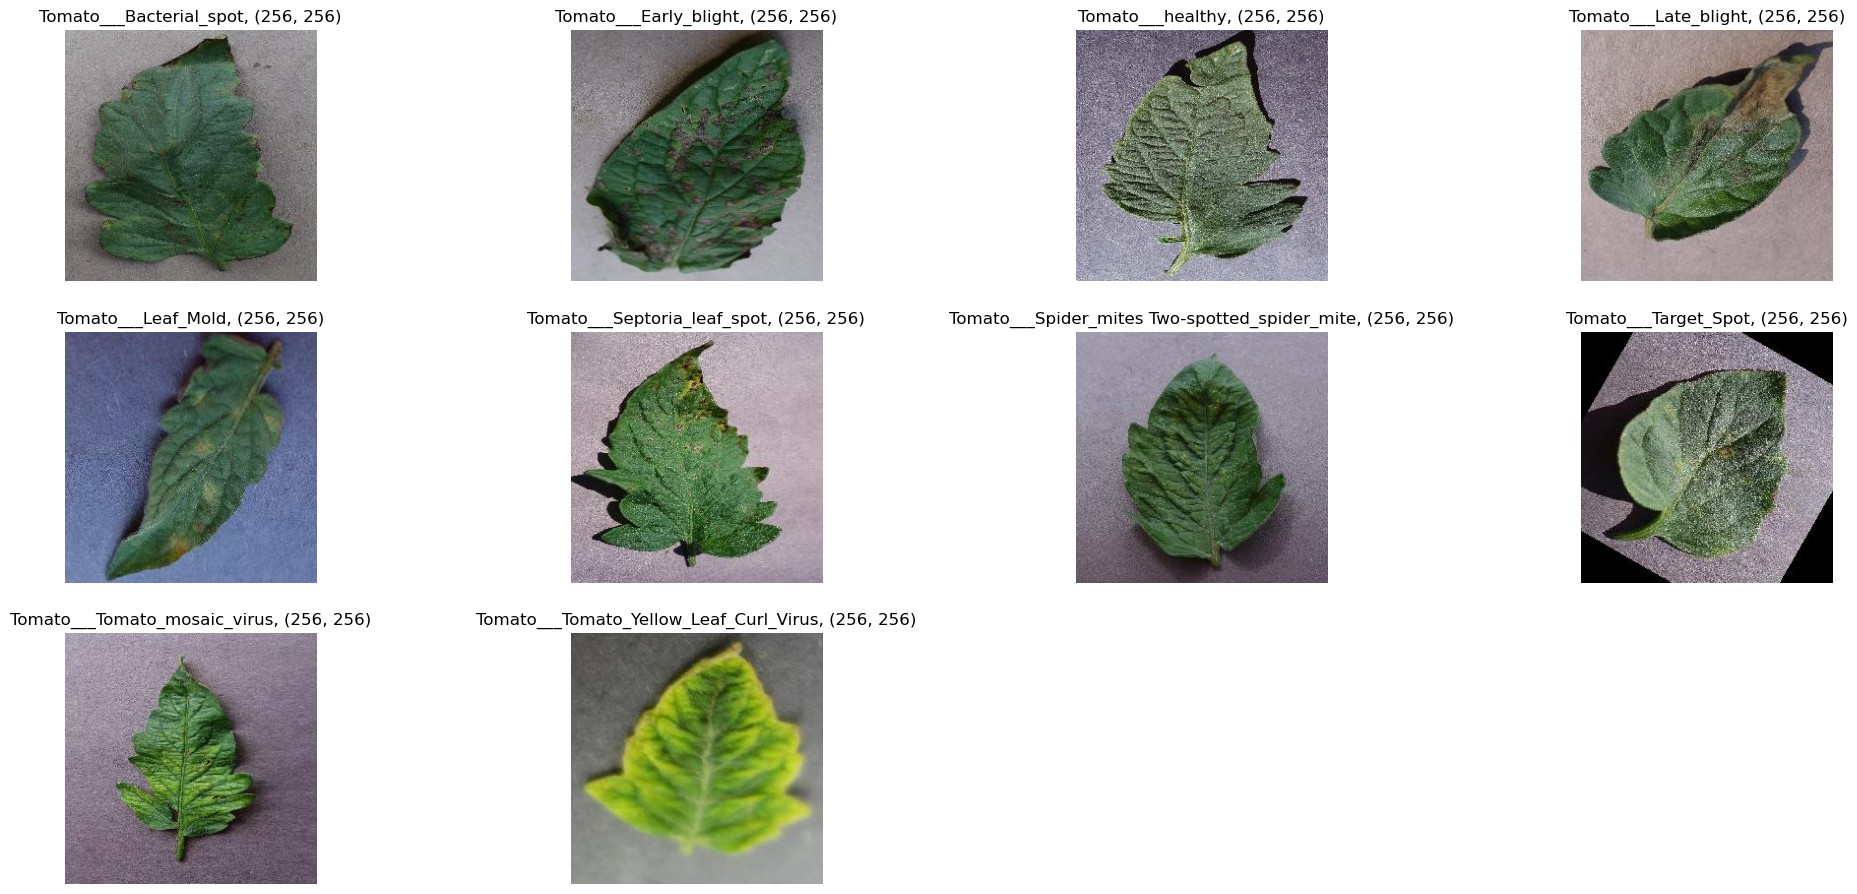

In [6]:
plt.figure(figsize=(25, 15)) 

for i, (cls,img) in enumerate(image_dict.items()): 

    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(img) 
    plt.title(f'{cls}, {img.size}') 
    plt.axis("off")


In [7]:
train_path =r'C:\Users\YekHam\YapayZeka_Proje\Tomato disease\train'
classes = os.listdir(train_path)
results = []
for i in enumerate(classes):
    pic = os.listdir(train_path+'/'+i[1])
    imgs = []
    for sample in pic:
        img = cv2.imread(train_path+'/'+i[1]+'/'+sample, -1)
        imgs.append(img)
    imgs = np.mean(imgs, axis=0)
    results.append((i[1], imgs))
    
    break

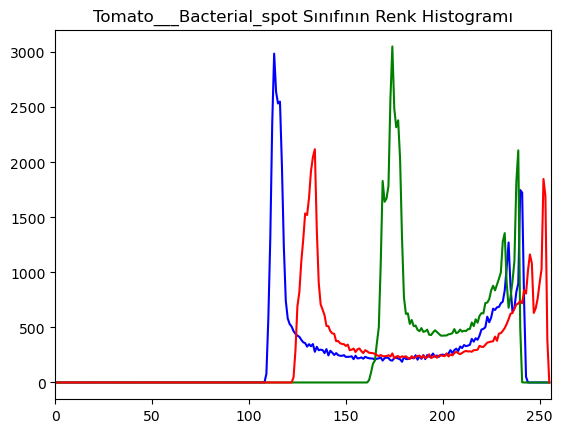

In [8]:
color = ('b','g','r') 
for clas, img in results:
    for channel,col in enumerate(color):
        img = ((img.astype(np.float64) / img.max())*255).astype(np.uint8)
        histr = cv2.calcHist([img],[channel],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.title(clas+' Sınıfının Renk Histogramı')
    plt.show()